In [1]:
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:

leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking the shape of data
leads_df.shape

(9240, 37)

In [4]:
#checking the datatypes of columns
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Get the value counts of all the columns with percent of values

for i in leads_df:
    print(leads_df[i].astype('category').value_counts(normalize=True))
    print('************************************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    0.000108
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    0.000108
aa27a0af-eeab-4007-a770-fa8a93fa53c8    0.000108
aa30ebb2-8476-41ce-9258-37cc025110d3    0.000108
aa405742-17ac-4c65-b19e-ab91c241cc53    0.000108
                                          ...   
539eb309-df36-4a89-ac58-6d3651393910    0.000108
539ffa32-1be7-4fe1-b04c-faf1bab763cf    0.000108
53aabd84-5dcc-4299-bbe3-62f3764b07b1    0.000108
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    0.000108
fffb0e5e-9f92-4017-9f42-781a69da4154    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
************************************
579533    0.000108
629593    0.000108
630390    0.000108
630403    0.000108
630405    0.000108
            ...   
602534    0.000108
602540    0.000108
602557    0.000108
602561    0.000108
660737    0.000108
Name: Lead Number, Length: 9240, dtype: float64
************************************
Landing Page Submission    0.528788
API                        0.387446
Lead Add F

In [6]:
#dropping Prospect ID column and as it is of no use
leads_df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [7]:
#dropping Country column as 95% of values are India which makes it one-sided
#dropping City column as it is of no use 

leads_df.drop(['Country','City'], axis = 1, inplace = True)


In [8]:
#Replacing the columns with Select values in columns-'', 'Lead Profile', 'How did you hear about X Education'
col=['Specialization', 'How did you hear about X Education', 'Lead Profile']
leads_df[col] = leads_df[col].replace('Select', np.NaN)

In [9]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
 #checking percentage of null values in each column

round(100*(leads_df.isnull().sum()/len(leads_df)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Dropping the columns which have more than 40% null values

In [11]:
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 40):
        leads_df.drop(i, 1, inplace = True)

In [12]:
#checking the shape of the dataset
leads_df.shape

(9240, 26)

In [13]:
#looking at columns with null values again
round(100*(leads_df.isnull().sum()/len(leads_df)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Columns having Null values now are -
    -Lead Source
    -TotalVisits
    -Page Views Per Visit
    -Specialization
    -Last Activity
    -What is your current occupation
    -Tags
    
#### Taking a closer look at these columns

In [14]:
#Lead Source

leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
youtubechannel          1
testone                 1
welearnblog_Home        1
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64

#### We can observe thst most of the sources are generated by Google.               Also noticed that there are different entries for 'google'. Ammending them under same name. Assigning 'Others' category to sources which are less in no.

In [15]:
leads_df['Lead Source']=leads_df['Lead Source'].replace(np.nan,'Google')

leads_df['Lead Source']=leads_df['Lead Source'].replace('google','Google')


In [16]:
col=['bing','google','Click2call','Live Chat','Social Media','Press_Release','Pay per Click Ads','WeLearn','testone','NC_EDM','blog','youtubechannel','welearnblog_Home']

leads_df['Lead Source'] = leads_df['Lead Source'].replace(col ,'Others')


In [17]:
#Lead Source

leads_df['Lead Source'].value_counts(dropna=False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

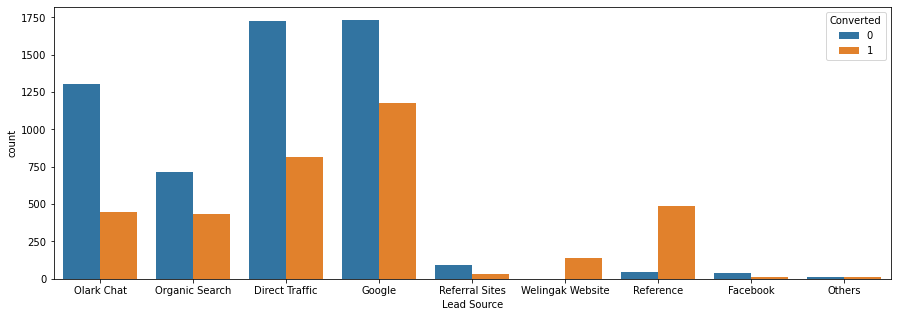

In [18]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leads_df)


#### Most of the  Leads are generated by Google and followed by Direct Traffic.

In [19]:
#TotalVisits
leads_df['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
24.0        5
27.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
141.0       1
41.0        1
55.0        1
115.0       1
32.0        1
54.0        1
42.0        1
251.0       1
74.0        1
43.0        1
30.0        1
Name: TotalVisits, dtype: int64

(0.0, 25.0)

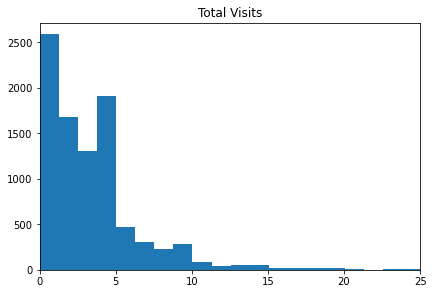

In [20]:
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.hist(leads_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

<AxesSubplot:xlabel='TotalVisits'>

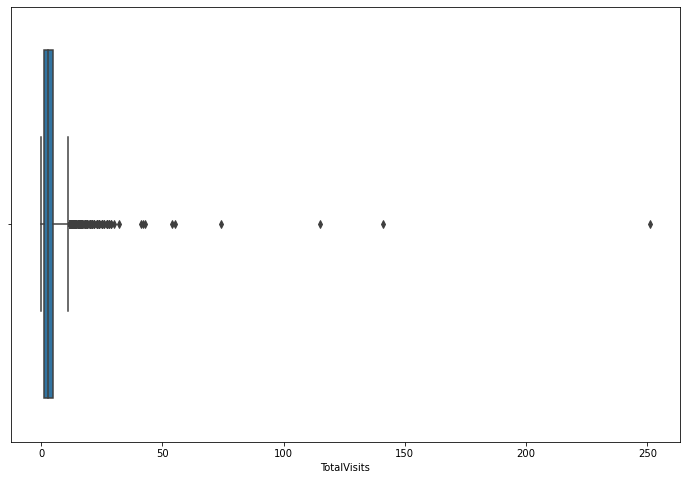

In [21]:
#checking for outliers
plt.figure(figsize = (12,8))
sns.boxplot(leads_df['TotalVisits'])

In [22]:
#visible that there is presence of Outliers

In [23]:
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### It is evident from above data that shows high difference between the min, max and 75%ile.

In [24]:
#capping the outliers to 90%
leads_df['TotalVisits'].loc[leads_df['TotalVisits'] >= leads_df['TotalVisits'].quantile(0.90)] = leads_df['TotalVisits'].quantile(0.90)


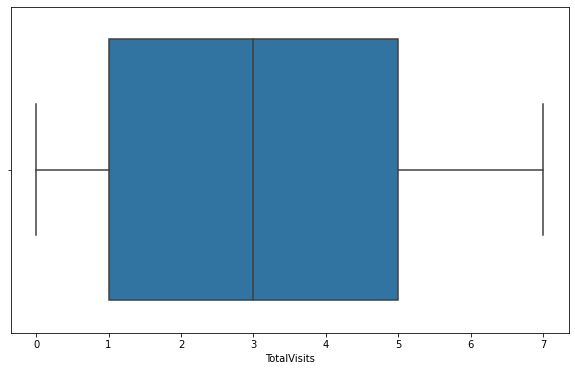

In [25]:
plt.figure(figsize = (10,6))
sns.boxplot(leads_df['TotalVisits'])
plt.show()

##### Page Views Per Visit

In [26]:
leads_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

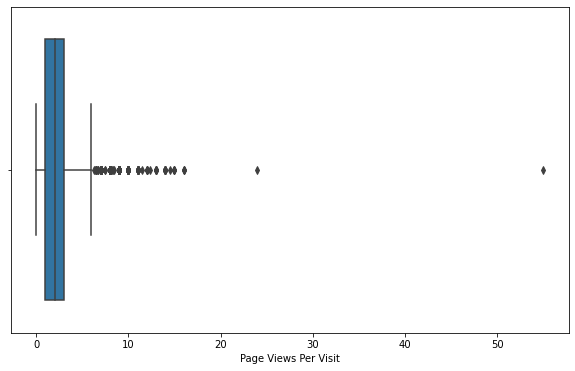

In [27]:
plt.figure(figsize = (10,6))
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()

##### Evident from the graph above there are many outliers in the column

In [28]:
#capping the outliers to 90%
leads_df['Page Views Per Visit'].loc[leads_df['Page Views Per Visit'] >= leads_df['Page Views Per Visit'].quantile(0.90)] = leads_df['Page Views Per Visit'].quantile(0.90)


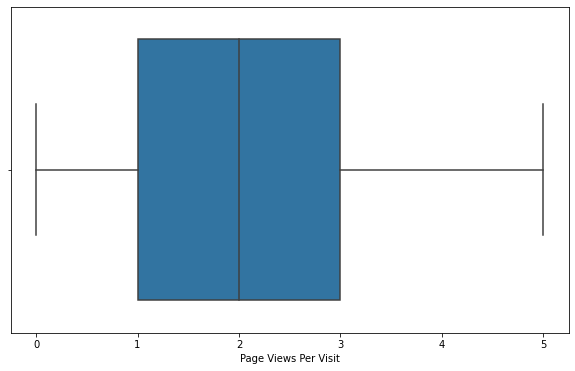

In [29]:
plt.figure(figsize = (10,6))
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()

##### Specialization

In [30]:
leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [31]:
#There is very high amount of null values in the Specialization. Not keeping them in analysis because majority of values are null

In [32]:
#dropping the records where Specialization is NaN

In [33]:
leads_df=leads_df[~pd.isnull(leads_df['Specialization'])]

#### Last Activity

In [34]:
#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    2345
SMS Sent                        1938
Page Visited on Website          488
Converted to Lead                267
Email Bounced                    210
Email Link Clicked               150
Olark Chat Conversation          146
Form Submitted on Website        114
Unreachable                       73
NaN                               49
Unsubscribed                      45
Had a Phone Conversation          24
View in browser link Clicked       3
Approached upfront                 3
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [35]:
leads_df['Last Activity'].mode()

0    Email Opened
dtype: object

In [36]:
#Replacing the null values with Mode i.e. Email Opened
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')

In [37]:
#Since other values are less in number we will make one bucket for them as Other
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Other')

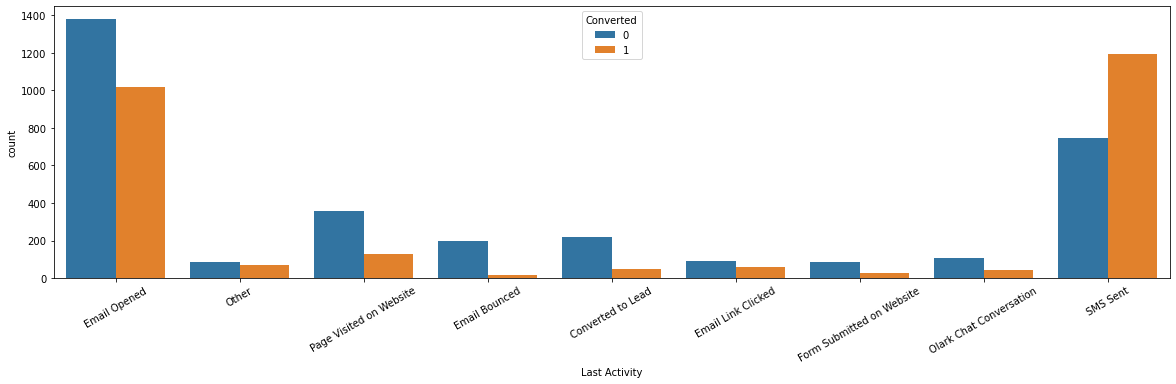

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(x='Last Activity', hue='Converted' , data = leads_df)
plt.xticks(rotation=30)
plt.show()

#### SMS Sent has high conversion rate 

#### What is your current occupation

In [39]:

leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              3772
NaN                     1257
Working Professional     675
Student                  125
Other                     15
Housewife                 10
Businessman                6
Name: What is your current occupation, dtype: int64

#### Replacing the Null values with 'NA' here.

In [40]:
leads_df['What is your current occupation']=leads_df['What is your current occupation'].replace(np.nan, 'NA')


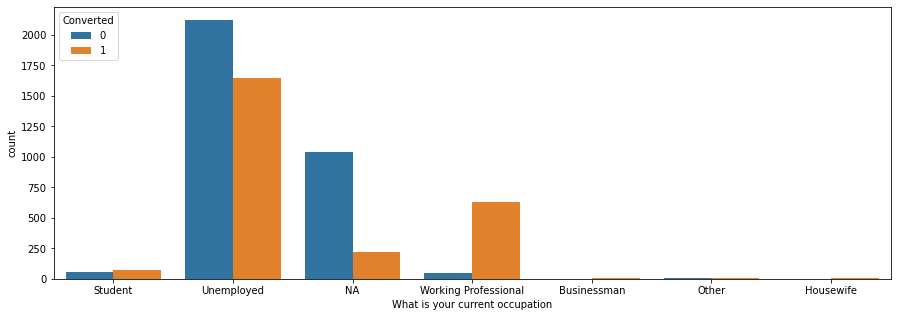

In [41]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads_df)


#### Tags

In [42]:
leads_df['Tags'].value_counts(dropna=False)

Will revert after reading the email                  1778
NaN                                                  1425
Ringing                                               873
Already a student                                     284
Interested in other courses                           267
Closed by Horizzon                                    262
switched off                                          180
Busy                                                  158
Lost to EINS                                          137
Not doing further education                           111
Interested  in full time MBA                           83
Graduation in progress                                 73
invalid number                                         67
Diploma holder (Not Eligible)                          43
wrong number given                                     37
opp hangup                                             27
number not provided                                    21
in touch with 

In [43]:
leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'Not Specified')


In [44]:
#Combining the values with low frequency under one categoy as Other
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
'Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'], 'Other')

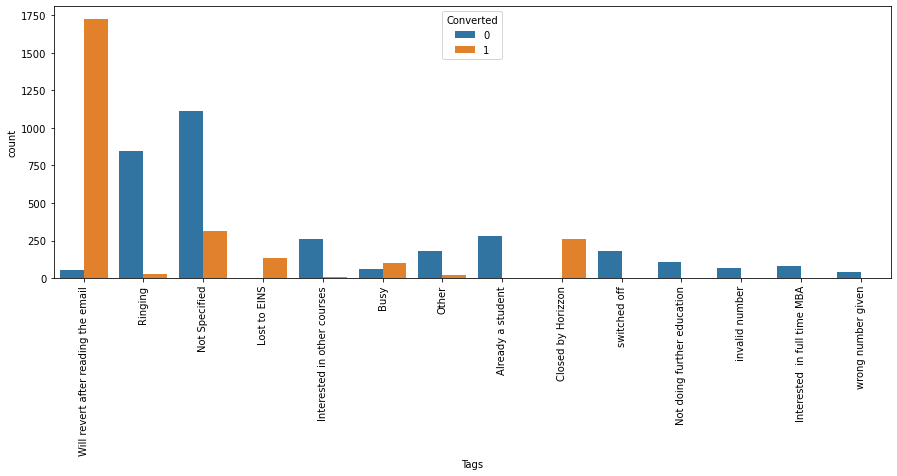

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(leads_df['Tags'], hue='Converted',data=leads_df)
plt.xticks(rotation=90)
plt.show()

### Looking at the Null values in the dataset now

In [46]:
#looking at columns with null values again
round(100*(leads_df.isnull().sum()/len(leads_df)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.04
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.04
Last Activity                                     0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    21.47
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [47]:
#Dropping the column "What matters most to you in choosing a course" because it is highly imbalanced
#Dropping the records which are less than 2%  null values


In [48]:
leads_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [49]:
lead_df0=leads_df.dropna()

In [50]:
leads_df.shape

(5860, 25)

In [51]:
round(100*(lead_df0.isnull().sum()/len(lead_df0)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [52]:
#Taking a look at the dataframe now
lead_df0.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Other,Media and Advertising,...,No,No,No,No,Ringing,No,No,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,IT Projects Management,...,No,No,No,No,Not Specified,No,No,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.00,Email Opened,Finance Management,...,No,No,No,No,Not Specified,No,No,No,No,Email Opened
10,Landing Page Submission,Organic Search,No,No,1,7.0,1351,5.00,Email Opened,Travel and Tourism,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,No,1,7.0,1343,2.67,Page Visited on Website,Human Resource Management,...,No,No,No,No,Lost to EINS,No,No,No,Yes,Page Visited on Website
12,API,Organic Search,No,No,1,7.0,1538,5.00,Email Opened,Marketing Management,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified
13,Landing Page Submission,Organic Search,No,No,0,5.0,170,5.00,Email Opened,Business Administration,...,No,No,No,No,Ringing,No,No,No,Yes,Email Opened
14,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,481,1.00,Email Bounced,Business Administration,...,No,No,No,No,Not Specified,No,No,No,No,Email Bounced


In [53]:
col=lead_df0.columns
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Lead Origin

In [54]:
#Lead Origin
lead_df0['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4761
API                         665
Lead Add Form               359
Lead Import                  14
Name: Lead Origin, dtype: int64

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

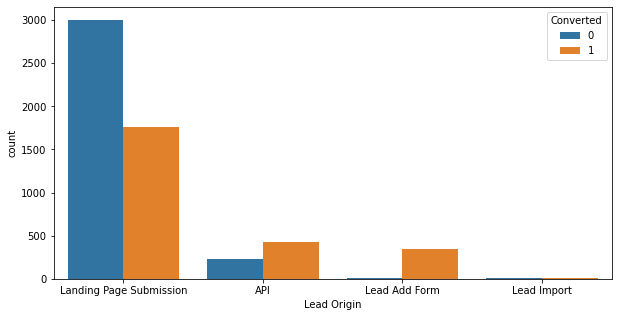

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(lead_df0['Lead Origin'], hue=lead_df0['Converted'])


#### Most of the leads are coming from landing page but the conversion rate is higher in API and Lead Add Form

### Do Not Email & Do Not Call

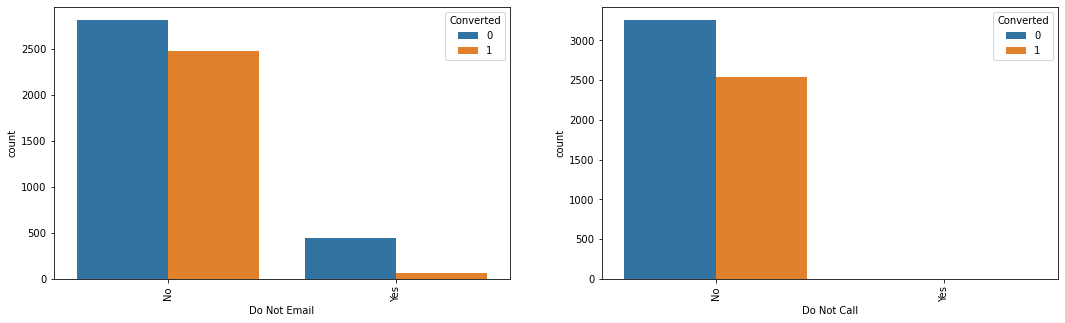

In [56]:
plt.figure(figsize=(18,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(lead_df0['Do Not Email'], hue=lead_df0['Converted'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(lead_df0['Do Not Call'], hue=lead_df0['Converted'])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

##### Looking at 'Do Not Call' column suggests that it is imbalanced it can be dropped

In [57]:
lead_df0.drop('Do Not Call',1,inplace=True)

In [58]:
lead_df0.shape

(5799, 24)

### Specialization

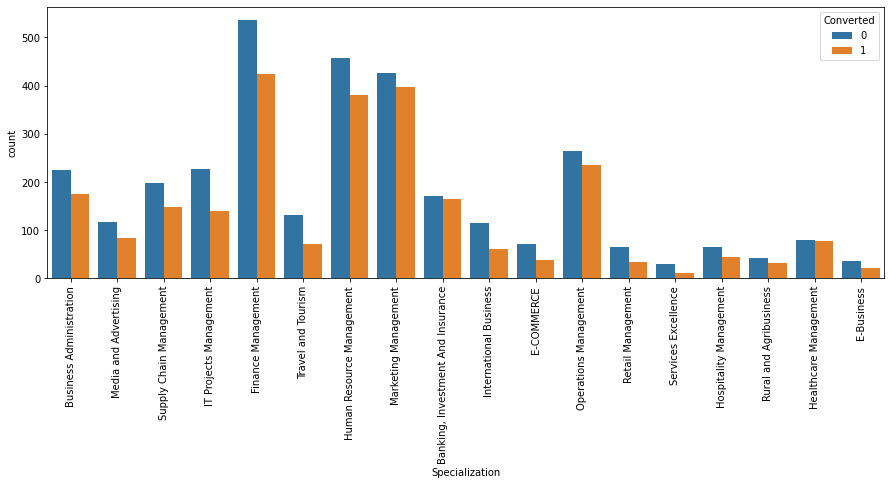

In [59]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df0['Specialization'], hue=lead_df0['Converted'])
plt.xticks(rotation=90)
plt.show()

In [60]:
#combining Management Specializations into same bucket as they show similar trends

lead_df0['Specialization'] = lead_df0['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

### Looking at how data is distributed among the Categorical values in dataset

In [61]:
lead_df0.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [62]:
col_list=['Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque']
for i in col_list:
    print(lead_df0[i].astype('category').value_counts(normalize=True))
    print('************************************')

No     0.998276
Yes    0.001724
Name: Search, dtype: float64
************************************
No    1.0
Name: Magazine, dtype: float64
************************************
No     0.999828
Yes    0.000172
Name: Newspaper Article, dtype: float64
************************************
No     0.999828
Yes    0.000172
Name: X Education Forums, dtype: float64
************************************
No     0.999828
Yes    0.000172
Name: Newspaper, dtype: float64
************************************
No     0.999483
Yes    0.000517
Name: Digital Advertisement, dtype: float64
************************************
No     0.998965
Yes    0.001035
Name: Through Recommendations, dtype: float64
************************************
No    1.0
Name: Receive More Updates About Our Courses, dtype: float64
************************************
No    1.0
Name: Update me on Supply Chain Content, dtype: float64
************************************
No    1.0
Name: Get updates on DM Content, dtype: float64
*******

### Looking at above we see that data is highly imbalanced in the forementioned columns and hence we can drop them

In [63]:
lead_df0.drop(col_list,1,inplace=True)

In [64]:
#checking the shape of the dataframe
lead_df0.shape

(5799, 13)

In [65]:
lead_df0.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,Ringing,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Management_Specializations,Unemployed,Will revert after reading the email,No,Modified
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,Email Opened,Management_Specializations,NA,Not Specified,Yes,Email Opened
9,API,Google,No,0,4.0,58,4.0,Email Opened,Management_Specializations,NA,Not Specified,No,Email Opened


# Data Preparation

In [66]:
#Converting 0/1 values for binary valued columns

col=['Do Not Email','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df0[col] = lead_df0[col].apply(binary_map)

In [67]:
lead_df0.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,Ringing,0,Modified
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,Management_Specializations,Unemployed,Will revert after reading the email,0,Modified
8,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.0,Email Opened,Management_Specializations,NA,Not Specified,1,Email Opened
9,API,Google,0,0,4.0,58,4.0,Email Opened,Management_Specializations,NA,Not Specified,0,Email Opened


### Creating Dummies

In [68]:
#getting a list of categorical columns foy creating dummy

cat_cols= lead_df0.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Last Notable Activity'],
      dtype='object')

In [69]:
dummy = pd.get_dummies(lead_df0[['Lead Origin']], drop_first=True)
lead_df0 = pd.concat([lead_df0,dummy],axis=1)



dummy = pd.get_dummies(lead_df0['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead_df0 = pd.concat([lead_df0, dummy], axis=1)


dummy = pd.get_dummies(lead_df0['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_NA'], 1)
lead_df0 = pd.concat([lead_df0, dummy], axis=1)


dummy = pd.get_dummies(lead_df0['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Other'], 1)
lead_df0 = pd.concat([lead_df0, dummy], axis=1)


dummy = pd.get_dummies(lead_df0['Specialization'],drop_first=True)
lead_df0 = pd.concat([lead_df0, dummy], axis=1)


dummy = pd.get_dummies(lead_df0['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
lead_df0 = pd.concat([lead_df0, dummy], axis=1)


dummy = pd.get_dummies(lead_df0['Last Notable Activity'], drop_first=True)
lead_df0 = pd.concat([lead_df0, dummy], axis=1)


In [70]:
#dropping the original columns
lead_df0.drop(cat_cols,1,inplace=True)

In [71]:
lead_df0.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,0,1,2.0,1640,2.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,2.0,71,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,4.0,58,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

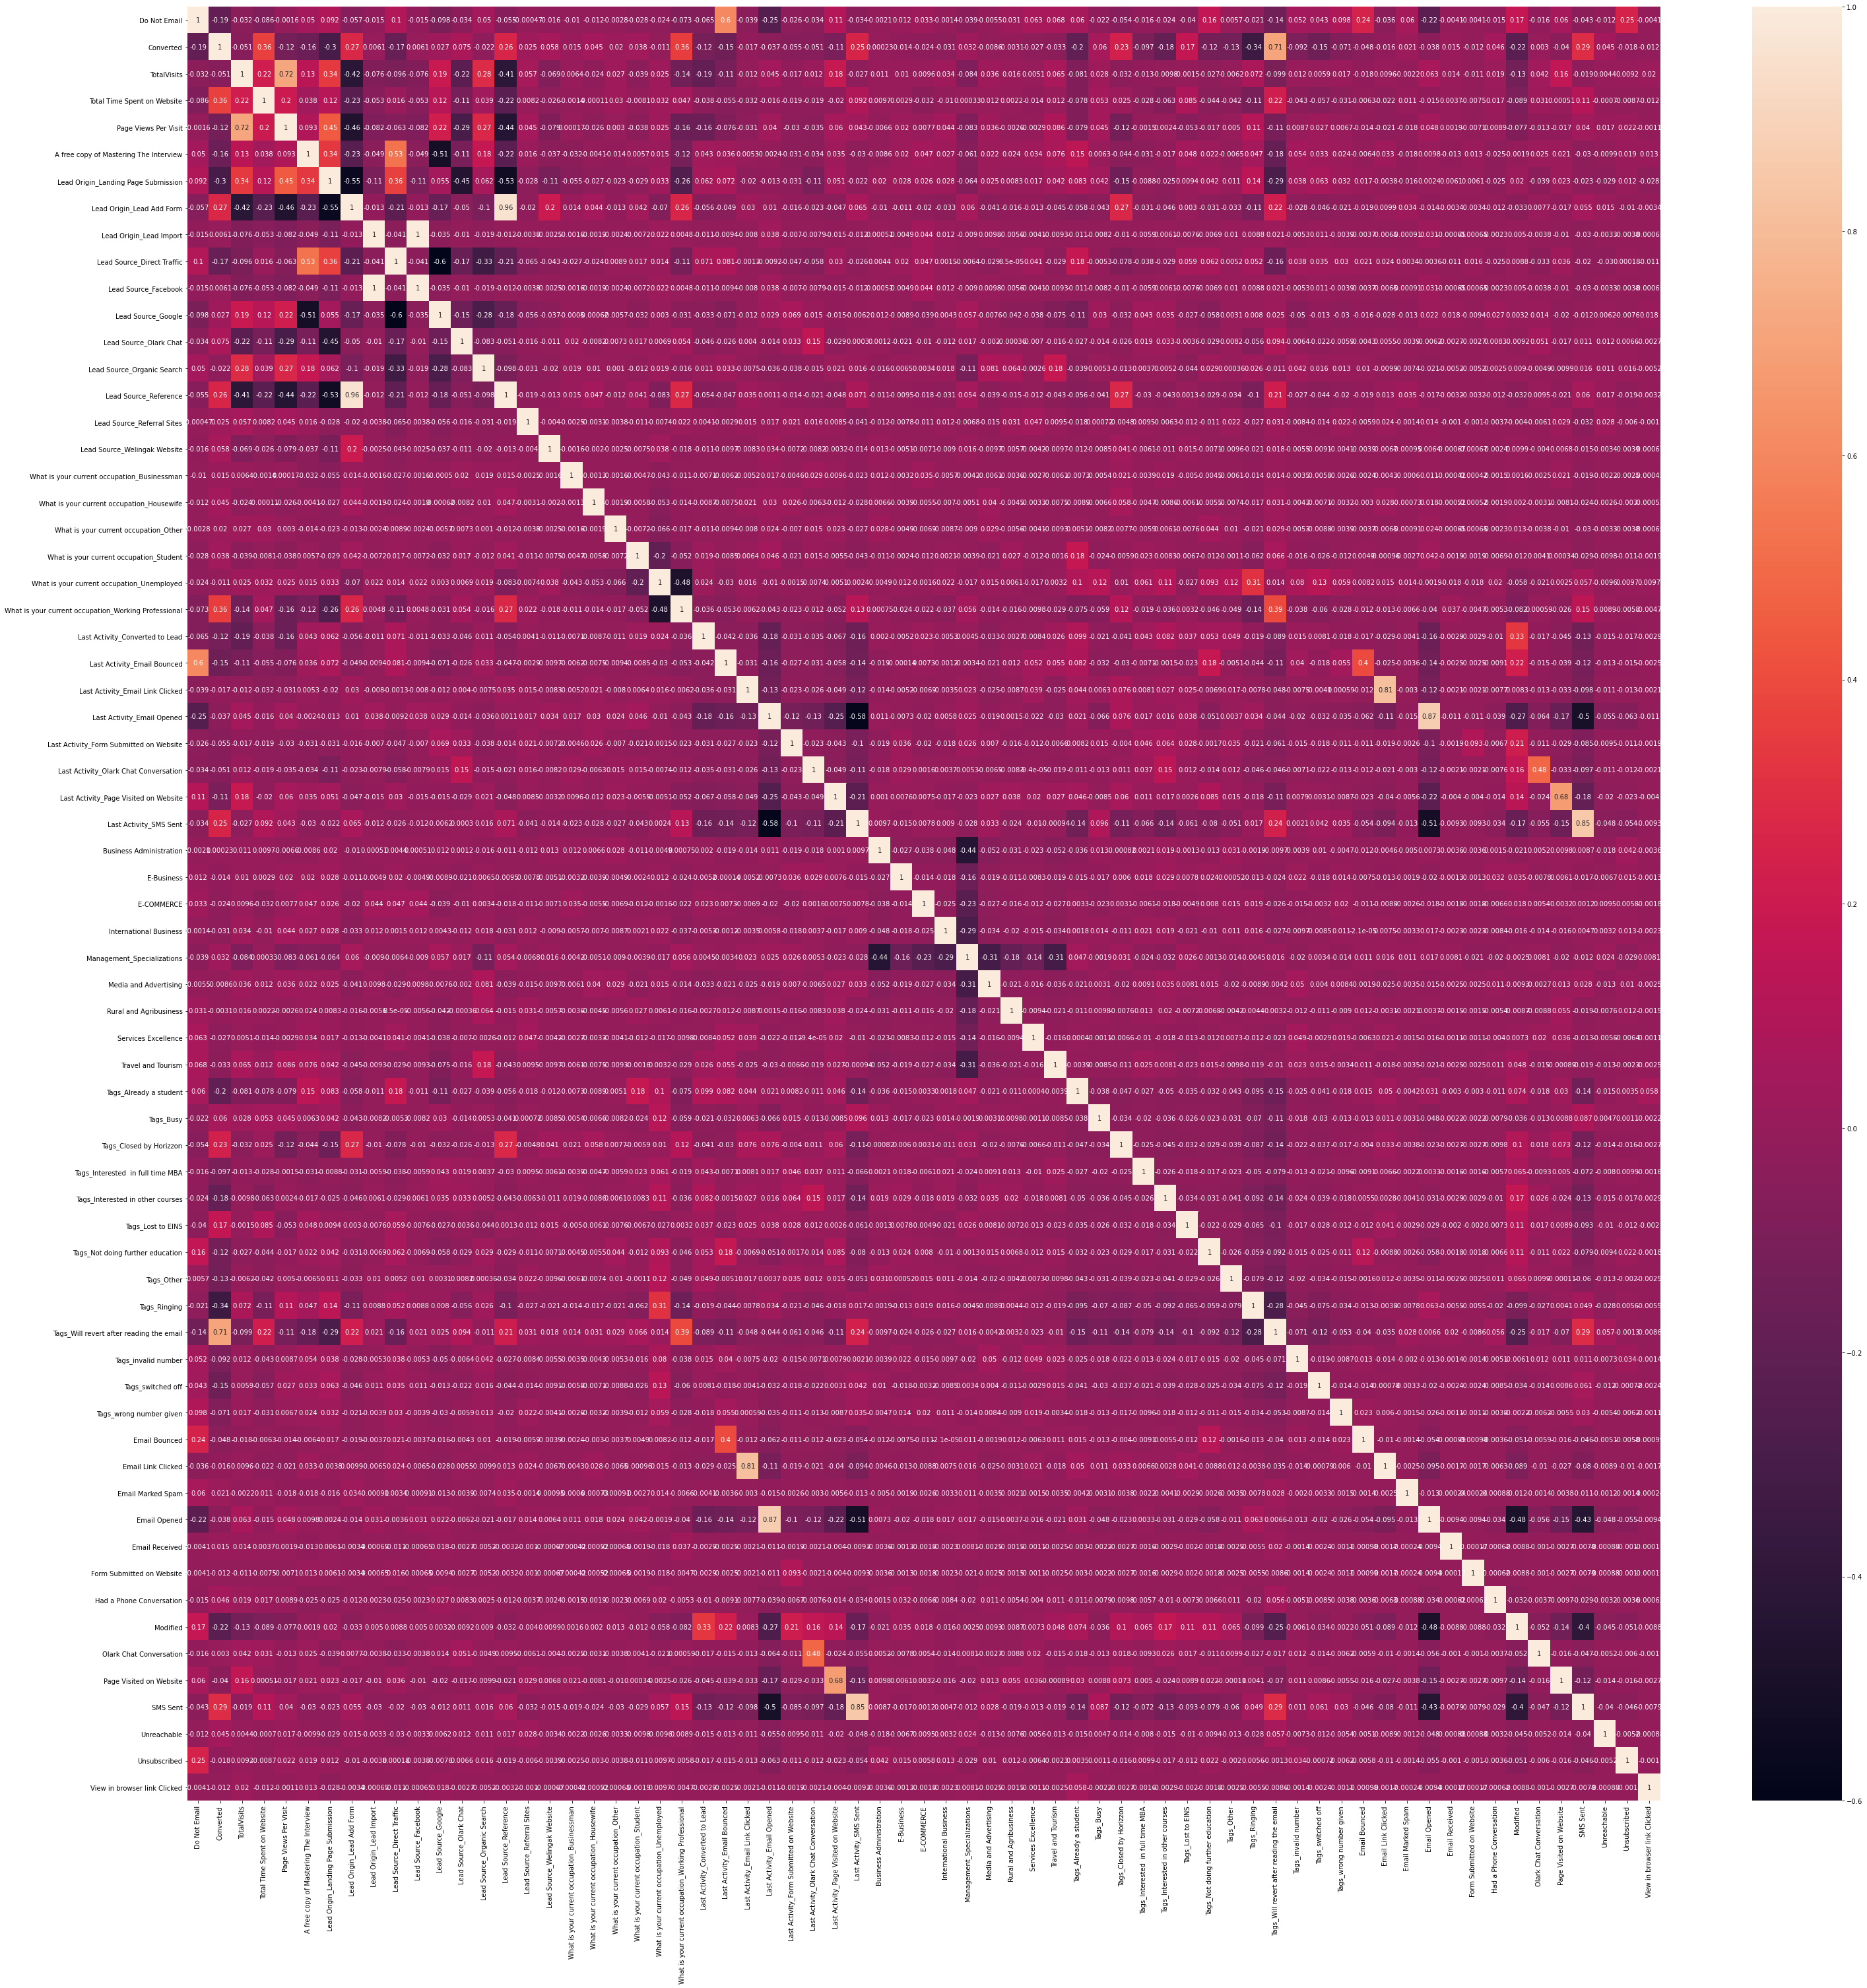

In [72]:
plt.figure(figsize=[50,50])
sns.heatmap(lead_df0.corr(),annot=True)

## Train-Test Split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# Assigning feature variables to X
X=lead_df0.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,2.0,1640,2.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,2.0,71,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,4.0,58,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Putting response variable to y
y = lead_df0['Converted']

y.head()

2    1
3    0
6    1
8    0
9    0
Name: Converted, dtype: int64

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4059 entries, 4446 to 9008
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          4059 non-null   int64  
 1   TotalVisits                                           4059 non-null   float64
 2   Total Time Spent on Website                           4059 non-null   int64  
 3   Page Views Per Visit                                  4059 non-null   float64
 4   A free copy of Mastering The Interview                4059 non-null   int64  
 5   Lead Origin_Landing Page Submission                   4059 non-null   uint8  
 6   Lead Origin_Lead Add Form                             4059 non-null   uint8  
 7   Lead Origin_Lead Import                               4059 non-null   uint8  
 8   Lead Source_Direct Traffic                            4

## Scaling the data

In [78]:
#importing library for feature scaling
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
4446,0.0,0.428571,0.448504,0.6,0.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6459,0.0,0.428571,0.106954,0.6,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8234,0.0,0.285714,0.037852,0.4,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5593,0.0,0.714286,0.072183,1.0,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4624,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Building Model using RFE and Statsmodels

In [80]:
import statsmodels.api as sm

In [81]:
#Using RFE to select 20 vars
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [82]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False])

In [83]:
#printing the resulted columns and  their ranks
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 40),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 46),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', False, 6),
 ('What is your current occupation_Businessman', False, 35),
 ('What is your current occupation_Housewife', False, 9),
 ('What is your current occupation_Other', False, 10),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional',

### checking the columns selected by RFE

In [84]:
# RFE supported columns
cols=X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Other',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Had a Phone Conversation', 'SMS Sent'],
      dtype='object')

In [85]:
#Building the model using the columns selected by RFE-


X_train = X_train[cols]

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

In [86]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4059
Model:                            GLM   Df Residuals:                     4038
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -667.18
Date:                Tue, 09 Aug 2022   Deviance:                       1334.4
Time:                        07:48:13   Pearson chi2:                 6.17e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2625      0.169    -19.269      0.000      -3.594      -2.931
Do Not Email                                            -1.6728      0.353     -4.745      0.000      -2.364      -0.982
Total Time Spent on Website                              4.0370      0.316     12.765      0.000       3.417       4.657
Lead Origin_Lead Add Form                                1.5578      0.506      3.078      0.002       0.566       2.550
What is your current occupation_Student                  2.1186      0.784      2.702      0.007       0.582       3.655
What is your current occupation_Unemployed               1.8864      0.188     10.057      0.000       1.519       2.254
What is your current occupation_Working Professional     2.5280      0.432      5.853      0.000       1.681       3.375
Tags_Already a student                                  -4.2257      0.743     -5.684      0.000      -5.683      -2.769
Tags_Closed by Horizzon                                  5.2492      1.029      5.100      0.000       3.232       7.266
Tags_Interested  in full time MBA                       -4.0027      1.042     -3.841      0.000      -6.045      -1.960
Tags_Interested in other courses                        -3.5378      0.513     -6.903      0.000      -4.542      -2.533
Tags_Lost to EINS                                        4.8507      0.742      6.535      0.000       3.396       6.305
Tags_Not doing further education                       -23.7514   1.35e+04     -0.002      0.999   -2.65e+04    2.64e+04
Tags_Other                                              -2.7595      0.397     -6.952      0.000      -3.537      -1.981
Tags_Ringing                                            -4.4367      0.305    -14.524      0.000      -5.035      -3.838
Tags_Will revert after reading the email                 3.1493      0.246     12.824      0.000       2.668       3.631
Tags_invalid number                                     -4.8708      1.159     -4.204      0.000      -7.142      -2.600
Tags_switched off                                       -4.8901      0.743     -6.578      0.000      -6.347      -3.433
Tags_wrong number given                                -24.5539   2.47e+04     -0.001      0.999   -4.85e+04    4.85e+04
Had a Phone Conversation                                 3.2895      1.429      2.303      0.021       0.490       6.089
SMS Sent                                                 2.0862      0.173     12.024      0.000       1.746       2.426
========================================================================================================================
"""

## As we see there are few features whose P-value is ranging near and above `0.05` -                           -
        -Lead Source_Referral Sites
        -Tags_Not doing further education
        -Tags_wrong number given

## Calculating VIF's

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,9.61
14,Tags_Will revert after reading the email,5.35
5,What is your current occupation_Working Profes...,3.10
13,Tags_Ringing,2.95
1,Total Time Spent on Website,2.24
6,Tags_Already a student,1.71
7,Tags_Closed by Horizzon,1.71
19,SMS Sent,1.62
9,Tags_Interested in other courses,1.55
16,Tags_switched off,1.43


In [89]:
#Dropping the feature - Tags_Not doing further education as it has high p-value

In [113]:
X_train_sm.drop('Tags_Not doing further education', axis = 1, inplace = True)

In [114]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4059
Model:                            GLM   Df Residuals:                     4042
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -735.81
Date:                Tue, 09 Aug 2022   Deviance:                       1471.6
Time:                        08:04:13   Pearson chi2:                 6.50e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8024      0.141    -19.823      0.000      -3.079      -2.525
Do Not Email                                            -1.8709      0.318     -5.886      0.000      -2.494      -1.248
Total Time Spent on Website                              4.0788      0.297     13.725      0.000       3.496       4.661
Lead Origin_Lead Add Form                                1.7578      0.498      3.529      0.000       0.781       2.734
What is your current occupation_Working Professional     0.7940      0.395      2.012      0.044       0.021       1.568
Tags_Already a student                                  -2.7900      0.726     -3.842      0.000      -4.213      -1.367
Tags_Closed by Horizzon                                  6.4386      1.024      6.285      0.000       4.431       8.447
Tags_Interested  in full time MBA                       -2.5696      1.025     -2.506      0.012      -4.579      -0.560
Tags_Interested in other courses                        -2.1914      0.498     -4.397      0.000      -3.168      -1.215
Tags_Lost to EINS                                        5.2906      0.731      7.239      0.000       3.858       6.723
Tags_Other                                              -1.4216      0.377     -3.769      0.000      -2.161      -0.682
Tags_Ringing                                            -3.1792      0.277    -11.474      0.000      -3.722      -2.636
Tags_Will revert after reading the email                 4.4811      0.215     20.835      0.000       4.060       4.903
Tags_invalid number                                     -3.6228      1.161     -3.119      0.002      -5.899      -1.347
Tags_switched off                                       -3.6167      0.734     -4.929      0.000      -5.055      -2.179
Had a Phone Conversation                                 3.1179      1.468      2.124      0.034       0.240       5.995
SMS Sent                                                 2.2807      0.163     13.952      0.000       1.960       2.601
========================================================================================================================
"""

In [115]:
#calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.32
1,Total Time Spent on Website,2.07
15,SMS Sent,1.55
3,What is your current occupation_Working Profes...,1.45
2,Lead Origin_Lead Add Form,1.38
5,Tags_Closed by Horizzon,1.26
10,Tags_Ringing,1.15
8,Tags_Lost to EINS,1.07
0,Do Not Email,1.06
4,Tags_Already a student,1.04


In [116]:
##Dropping the feature - 'Tags_wrong number given' as it has high p-value

In [117]:
X_train_sm.drop('Tags_wrong number given', axis = 1, inplace = True)

In [118]:
#Rebuilding the model after dropping "Tags_wrong number given"


logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm4.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4059
Model:                            GLM   Df Residuals:                     4042
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -735.81
Date:                Tue, 09 Aug 2022   Deviance:                       1471.6
Time:                        08:04:25   Pearson chi2:                 6.50e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8024      0.141    -19.823      0.000      -3.079      -2.525
Do Not Email                                            -1.8709      0.318     -5.886      0.000      -2.494      -1.248
Total Time Spent on Website                              4.0788      0.297     13.725      0.000       3.496       4.661
Lead Origin_Lead Add Form                                1.7578      0.498      3.529      0.000       0.781       2.734
What is your current occupation_Working Professional     0.7940      0.395      2.012      0.044       0.021       1.568
Tags_Already a student                                  -2.7900      0.726     -3.842      0.000      -4.213      -1.367
Tags_Closed by Horizzon                                  6.4386      1.024      6.285      0.000       4.431       8.447
Tags_Interested  in full time MBA                       -2.5696      1.025     -2.506      0.012      -4.579      -0.560
Tags_Interested in other courses                        -2.1914      0.498     -4.397      0.000      -3.168      -1.215
Tags_Lost to EINS                                        5.2906      0.731      7.239      0.000       3.858       6.723
Tags_Other                                              -1.4216      0.377     -3.769      0.000      -2.161      -0.682
Tags_Ringing                                            -3.1792      0.277    -11.474      0.000      -3.722      -2.636
Tags_Will revert after reading the email                 4.4811      0.215     20.835      0.000       4.060       4.903
Tags_invalid number                                     -3.6228      1.161     -3.119      0.002      -5.899      -1.347
Tags_switched off                                       -3.6167      0.734     -4.929      0.000      -5.055      -2.179
Had a Phone Conversation                                 3.1179      1.468      2.124      0.034       0.240       5.995
SMS Sent                                                 2.2807      0.163     13.952      0.000       1.960       2.601
========================================================================================================================
"""

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.32
1,Total Time Spent on Website,2.07
15,SMS Sent,1.55
3,What is your current occupation_Working Profes...,1.45
2,Lead Origin_Lead Add Form,1.38
5,Tags_Closed by Horizzon,1.26
10,Tags_Ringing,1.15
8,Tags_Lost to EINS,1.07
0,Do Not Email,1.06
4,Tags_Already a student,1.04


In [120]:
### All the features have P-value under 0.05 but we have high VIF value for - "What is your current occupation_Unemployed"
### Hence dropping the feature

In [121]:
X_train_sm.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [122]:
#Rebuilding the model 


logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4059
Model:                            GLM   Df Residuals:                     4042
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -735.81
Date:                Tue, 09 Aug 2022   Deviance:                       1471.6
Time:                        08:04:37   Pearson chi2:                 6.50e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8024      0.141    -19.823      0.000      -3.079      -2.525
Do Not Email                                            -1.8709      0.318     -5.886      0.000      -2.494      -1.248
Total Time Spent on Website                              4.0788      0.297     13.725      0.000       3.496       4.661
Lead Origin_Lead Add Form                                1.7578      0.498      3.529      0.000       0.781       2.734
What is your current occupation_Working Professional     0.7940      0.395      2.012      0.044       0.021       1.568
Tags_Already a student                                  -2.7900      0.726     -3.842      0.000      -4.213      -1.367
Tags_Closed by Horizzon                                  6.4386      1.024      6.285      0.000       4.431       8.447
Tags_Interested  in full time MBA                       -2.5696      1.025     -2.506      0.012      -4.579      -0.560
Tags_Interested in other courses                        -2.1914      0.498     -4.397      0.000      -3.168      -1.215
Tags_Lost to EINS                                        5.2906      0.731      7.239      0.000       3.858       6.723
Tags_Other                                              -1.4216      0.377     -3.769      0.000      -2.161      -0.682
Tags_Ringing                                            -3.1792      0.277    -11.474      0.000      -3.722      -2.636
Tags_Will revert after reading the email                 4.4811      0.215     20.835      0.000       4.060       4.903
Tags_invalid number                                     -3.6228      1.161     -3.119      0.002      -5.899      -1.347
Tags_switched off                                       -3.6167      0.734     -4.929      0.000      -5.055      -2.179
Had a Phone Conversation                                 3.1179      1.468      2.124      0.034       0.240       5.995
SMS Sent                                                 2.2807      0.163     13.952      0.000       1.960       2.601
========================================================================================================================
"""

#### 'What is your current occupation_Studen' has now increased to 0.68

In [123]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.32
1,Total Time Spent on Website,2.07
15,SMS Sent,1.55
3,What is your current occupation_Working Profes...,1.45
2,Lead Origin_Lead Add Form,1.38
5,Tags_Closed by Horizzon,1.26
10,Tags_Ringing,1.15
8,Tags_Lost to EINS,1.07
0,Do Not Email,1.06
4,Tags_Already a student,1.04


### As we see, the VIF values are all within threshold range

In [124]:
#dropping 'What is your current occupation_Student'

X_train_sm.drop('What is your current occupation_Student', axis = 1, inplace = True)

In [125]:
#Rebuilding the model 


logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res=logm6.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4059
Model:                            GLM   Df Residuals:                     4042
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -735.81
Date:                Tue, 09 Aug 2022   Deviance:                       1471.6
Time:                        08:05:01   Pearson chi2:                 6.50e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8024      0.141    -19.823      0.000      -3.079      -2.525
Do Not Email                                            -1.8709      0.318     -5.886      0.000      -2.494      -1.248
Total Time Spent on Website                              4.0788      0.297     13.725      0.000       3.496       4.661
Lead Origin_Lead Add Form                                1.7578      0.498      3.529      0.000       0.781       2.734
What is your current occupation_Working Professional     0.7940      0.395      2.012      0.044       0.021       1.568
Tags_Already a student                                  -2.7900      0.726     -3.842      0.000      -4.213      -1.367
Tags_Closed by Horizzon                                  6.4386      1.024      6.285      0.000       4.431       8.447
Tags_Interested  in full time MBA                       -2.5696      1.025     -2.506      0.012      -4.579      -0.560
Tags_Interested in other courses                        -2.1914      0.498     -4.397      0.000      -3.168      -1.215
Tags_Lost to EINS                                        5.2906      0.731      7.239      0.000       3.858       6.723
Tags_Other                                              -1.4216      0.377     -3.769      0.000      -2.161      -0.682
Tags_Ringing                                            -3.1792      0.277    -11.474      0.000      -3.722      -2.636
Tags_Will revert after reading the email                 4.4811      0.215     20.835      0.000       4.060       4.903
Tags_invalid number                                     -3.6228      1.161     -3.119      0.002      -5.899      -1.347
Tags_switched off                                       -3.6167      0.734     -4.929      0.000      -5.055      -2.179
Had a Phone Conversation                                 3.1179      1.468      2.124      0.034       0.240       5.995
SMS Sent                                                 2.2807      0.163     13.952      0.000       1.960       2.601
========================================================================================================================
"""

### All the p-values are below 0.05

### Calulating VIF

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.32
1,Total Time Spent on Website,2.07
15,SMS Sent,1.55
3,What is your current occupation_Working Profes...,1.45
2,Lead Origin_Lead Add Form,1.38
5,Tags_Closed by Horizzon,1.26
10,Tags_Ringing,1.15
8,Tags_Lost to EINS,1.07
0,Do Not Email,1.06
4,Tags_Already a student,1.04


### As we can see the VIF values are within range too

# Model Evaluation

In [127]:
# predicting the probabilities on the train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

4446    0.787124
6459    0.007134
8234    0.933550
5593    0.003378
4624    0.981283
7672    0.999178
2393    0.208514
1016    0.006669
1724    0.083563
48      0.116618
dtype: float64

In [128]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.78712382, 0.00713351, 0.93355033, 0.00337773, 0.98128318,
       0.99917842, 0.20851375, 0.00666904, 0.0835626 , 0.11661762])

In [129]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.787124,4446
1,0,0.007134,6459
2,1,0.933550,8234
3,0,0.003378,5593
4,1,0.981283,4624


In [130]:
#taking 0.5 as cutoff value to differentiate
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.787124,4446,1
1,0,0.007134,6459,0
2,1,0.933550,8234,1
3,0,0.003378,5593,0
4,1,0.981283,4624,1


# Evaluation Metrics for Predicted values

In [131]:
#Printing confusion Metrics
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2166   82]
 [ 176 1635]]


In [132]:
# Predicted     not_converted    converted
# Actual
# not_converted        2159       89
# converted             135      1676

In [133]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9364375461936437

### The model has 93% Accuracy

In [134]:
#true positives
TP = confusion[1,1]

#true negatives
TN = confusion[0,0]

#false positives
FP = confusion[0,1] 

#false negatives
FN = confusion[1,0] 

In [135]:
#sensitivity of logistic regression model
TP / float(TP+FN)

0.9028161236885699

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.9635231316725978

In [137]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.036476868327402136


In [138]:
# positive predictive value 
print (TP / float(TP+FP))

0.9522422830518346


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9248505550811272


## PLOTTING ROC CURVE

In [140]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [141]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

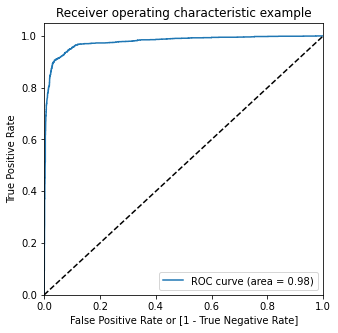

In [142]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### The ROC Curve should be close to 1. Here, we have got value of 0.98 indicating a good predictive model.

### Finding the Optimal Cutoff Point

In [143]:
# Let's create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.787124,4446,1,1,1,1,1,1,1,1,1,0,0
1,0,0.007134,6459,0,1,0,0,0,0,0,0,0,0,0
2,1,0.933550,8234,1,1,1,1,1,1,1,1,1,1,1
3,0,0.003378,5593,0,1,0,0,0,0,0,0,0,0,0
4,1,0.981283,4624,1,1,1,1,1,1,1,1,1,1,1


In [144]:
cutoff_ = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [145]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_)

     prob  accuracy     sensi     speci
0.0   0.0  0.446169  1.000000  0.000000
0.1   0.1  0.872136  0.972943  0.790925
0.2   0.2  0.922148  0.961900  0.890125
0.3   0.3  0.927322  0.944782  0.913256
0.4   0.4  0.931264  0.922142  0.938612
0.5   0.5  0.936438  0.902816  0.963523
0.6   0.6  0.932988  0.886251  0.970641
0.7   0.7  0.929539  0.874103  0.974199
0.8   0.8  0.921409  0.851463  0.977758
0.9   0.9  0.892338  0.773606  0.987989


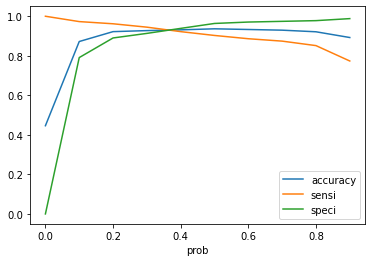

In [146]:
cutoff_.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Seems the optimal point lies between .35 to .40

In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.787124,4446,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.007134,6459,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.933550,8234,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.003378,5593,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.981283,4624,1,1,1,1,1,1,1,1,1,1,1,1


In [148]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.787124,4446,1,1,1,1,1,1,1,1,1,0,0,1,79
1,0,0.007134,6459,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0.933550,8234,1,1,1,1,1,1,1,1,1,1,1,1,93
3,0,0.003378,5593,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0.981283,4624,1,1,1,1,1,1,1,1,1,1,1,1,98


### Checking the overall accuracy

In [149]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9290465631929047

In [150]:
#confusion Metrics
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2091,  157],
       [ 131, 1680]], dtype=int64)

In [151]:
#true positives
TP = confusion2[1,1]

#true negatives
TN = confusion2[0,0]

#false positives
FP = confusion2[0,1] 

#false negatives
FN = confusion2[1,0] 

In [152]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9276642738818333

In [153]:
# Let us calculate specificity
TN / float(TN+FP)

0.9301601423487544

## Precision and Recall

In [154]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2091,  157],
       [ 131, 1680]], dtype=int64)

#### Calculating Precision

In [155]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.914534567229178

#### Calculating Recall

In [156]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9276642738818333

### Precision & Recall Trade-off

In [157]:
from sklearn.metrics import precision_recall_curve

In [158]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       0
 4       1
        ..
 4054    0
 4055    1
 4056    0
 4057    0
 4058    1
 Name: Converted, Length: 4059, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       1
        ..
 4054    0
 4055    1
 4056    0
 4057    0
 4058    0
 Name: Predicted, Length: 4059, dtype: int64)

In [159]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

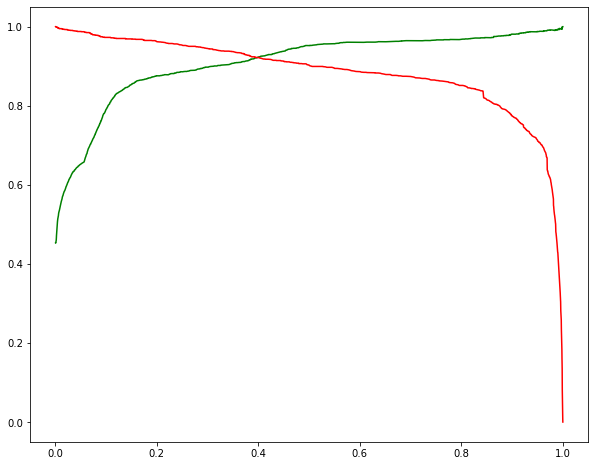

In [160]:
plt.figure(figsize=[10,8])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Prediction on test set

In [161]:
#Scaling test-set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
5009,0.0,1.000000,0.052107,1.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6906,0.0,0.571429,0.693249,0.4,0.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8831,0.0,0.285714,0.062528,0.4,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2233,0.0,0.571429,0.638876,0.8,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3695,0.0,0.714286,0.193928,1.0,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [162]:
cols=X_train.columns

In [163]:
X_test=X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Had a Phone Conversation,SMS Sent
5009,0.0,0.052107,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6906,0.0,0.693249,0,0,0,0,0,0,0,0,0,1,0,0,0,1
8831,0.0,0.062528,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2233,0.0,0.638876,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3695,0.0,0.193928,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#adding the const to test set
X_test_sm=sm.add_constant(X_test)

#checking shape to confirm
X_test_sm.shape